In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Generative Causal Explanations for Graph Neural Networks
Giới thiệu phương pháp Gem, một cách tiếp cận mới để cung cấp giải thích có tính giải thích được cho Mạng Nơ-ron Đồ Thị (GNNs) dựa trên nguyên lý học nhân quả
- Khác với các bộ giải thích hiện có cho GNNs, Gem giải thích GNNs trên dữ liệu có cấu trúc đồ thị từ góc độ nhân quả. Nó có khả năng tổng quát hóa tốt hơn vì không yêu cầu cấu trúc nội bộ của GNNs hoặc kiến thức trước về các nhiệm vụ học đồ thị.
- Gem sẽ tạo ra giải thích dưới dạng các đồ thị con có ảnh hưởng đến kết quả dự đoán của đồ thị
- Có 2 loại phân loại được đề cập trong bài báo đó là : Phân loại node và phân loại đồ thị
- Input của model sẽ là:
  + Ma trận kề
  + Các đỉnh
  + Node
  
- Output:
  + Tạo ra một sub graph - Lời giải thích - Sub Graph này được cho rằng có ảnh hưởng đến kết quả dự đoán của đồ thị

- File: Distillation: Là file chứa các ground-truth explanations ( Giải thích chuẩn ) là sub graph ( Lời giải thích cho đồ thị đó) ( Có thể coi là lablels của đồ thị đó )
- File: ckpt là file chứa data, đồ thị

- Quá trình training sẽ dự đoán các node, đồ thị khớp với các ground-truth explanations




In [ ]:
import zipfile
import os

# Danh sách các tệp zip cần giải nén
zip_filename = ['/content/drive/MyDriveS/3rd_year/NLP/Pro/distillation.zip',
                '/content/drive/MyDrive/3rd_year/NLP/Pro/ckpt.zip']

# Thư mục đích để giải nén các tệp
extract_dir = './'

# Lặp qua từng tệp zip trong danh sách
for file in zip_filename:
    # Kiểm tra xem tệp có tồn tại không
    if os.path.isfile(file):
        # Mở tệp zip và giải nén vào thư mục đích
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"File {file} has been extracted to {extract_dir}")
    else:

        print(f"File {file} does not exist. Please check the path.")


File /content/drive/MyDrive/Huflit/3rd_year/NLP/Pro/distillation.zip has been extracted to ./
File /content/drive/MyDrive/Huflit/3rd_year/NLP/Pro/ckpt.zip has been extracted to ./


In [ ]:
#synthetic model
!unrar x /content/drive/MyDrive/3rd_year/NLP/Pro/syn1_base_h20_o20_explain.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Huflit/3rd_year/NLP/Pro/syn1_base_h20_o20_explain.rar

Creating    syn1_base_h20_o20_explain                                 OK
Extracting  syn1_base_h20_o20_explain/masked_adj_node_idx_300graph_idx_0.ckpt       1%  OK 
Extracting  syn1_base_h20_o20_explain/masked_adj_node_idx_300graph_idx_0.npy       1%  OK 
Extracting  syn1_base_h20_o20_explain/masked_adj_node_idx_301graph_idx_0.ckpt       2%  OK 
Extracting  syn1_base_h20_o20_explain/masked_adj_node_idx_301graph_idx_0.npy       2%  OK 
Extracting  syn1_base_h20_o20_explain/masked_adj_node_idx_302graph_idx_0.ckpt       2%  OK 
Extracting  syn1_base_h20_o20_explain/masked_adj_node_idx_302graph_idx_0.npy       2%  OK 
Extracting  syn1_base_h20_o20_explain/masked_adj_node_idx_303graph_idx_0.ckpt       2%  OK 
Extracting  syn1_base_h20_o20_explain/masked_adj_node

In [ ]:
#Mutagenicity
!unrar x /content/drive/MyDrive/3rd_year/NLP/Pro/Mutagenicity_base_h20_o20_explain.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Huflit/3rd_year/NLP/Pro/Mutagenicity_base_h20_o20_explain.rar

Creating    Mutagenicity_base_h20_o20_explain                         OK
Extracting  Mutagenicity_base_h20_o20_explain/masked_adj_node_idx_0graph_idx_3902.ckpt       0%  OK 
Extracting  Mutagenicity_base_h20_o20_explain/masked_adj_node_idx_0graph_idx_3902.npy       0%  OK 
Extracting  Mutagenicity_base_h20_o20_explain/masked_adj_node_idx_0graph_idx_3903.ckpt       0%  OK 
Extracting  Mutagenicity_base_h20_o20_explain/masked_adj_node_idx_0graph_idx_3903.npy       0%  OK 
Extracting  Mutagenicity_base_h20_o20_explain/masked_adj_node_idx_0graph_idx_3904.ckpt       0%  OK 
Extracting  Mutagenicity_base_h20_o20_explain/masked_adj_node_idx_0graph_idx_3904.npy       0%  OK 
Extracting  Mutagenicity_base_h20_o20_explain/masked_adj_node_idx_0graph_idx_3905.ckpt     

###**Định nghĩa một lớp GraphConvolution trong PyTorch, một phần quan trọng của Mạng Nơ-ron Đồ Thị (Graph Neural Networks - GNNs).**

- Lớp GraphConvolution thực hiện một phép tích chập trên đồ thị, giúp học và tổng hợp thông tin từ các nút và các cạnh trong đồ thị.

In [ ]:
import torch
import torch.nn.functional as F
from torch.nn.modules.module import Module
from torch.nn.parameter import Parameter


class GraphConvolution(Module):

    # khởi tạo các tham số
    def __init__(self, in_features, out_features, dropout=0., act=F.relu):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.dropout = dropout
        self.act = act
        self.linear = torch.nn.Linear(in_features, out_features, bias=False)
        self.reset_parameters()

    # Khởi tạo lại các trọng số
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.linear.weight)

    # Định nghĩa cách tính toán đầu vào cho Graph convolution
    def forward(self, input, adj):
        input = F.dropout(input, self.dropout, self.training)
        support = self.linear(input)
        output = torch.bmm(adj, support)
        output = self.act(output)
        return output

    # trả về một chuỗi mô tả lớp GraphConvolution, bao gồm số lượng đặc trưng đầu vào và đầu ra.
    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'


###**Định nghĩa các lớp cho mô hình Biến đổi Tự mã hóa Đồ thị (Graph Convolutional Variational Autoencoder - GCNVAE) và một lớp để giải mã dự đoán ma trận kề của đồ thị.**
- Mục đích chính:
1. GCNModelVAE: Xây dựng một mô hình GCNVAE để mã hóa và giải mã thông tin từ đồ thị.
2. GCNModelVAE3: Một phiên bản mở rộng của GCNModelVAE với thêm một lớp tích chập.
3. InnerProductDecoder: Giải mã đầu ra của mô hình GCNVAE để dự đoán ma trận kề của đồ thị.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F



# movel VAE
class GCNModelVAE(nn.Module):
    # định nghĩa các tham số
    def __init__(self, input_feat_dim, hidden_dim1, hidden_dim2, dropout):
        super(GCNModelVAE, self).__init__()

        # Lớp tích chập đầu tiên : Input -> hidden_dim1
        self.gc1 = GraphConvolution(input_feat_dim, hidden_dim1, dropout, act=F.relu)
        self.gc2 = GraphConvolution(hidden_dim1, hidden_dim2, dropout, act=lambda x: x)
        self.gc3 = GraphConvolution(hidden_dim1, hidden_dim2, dropout, act=lambda x: x)
        # Khởi tạo bộ giải mã cho model GCNModelVAE
        self.dc = InnerProductDecoder(dropout, act=lambda x: x)

    # Mã hóa đầu vào
    def encode(self, x, adj):
        hidden1 = self.gc1(x, adj)
        return self.gc2(hidden1, adj), self.gc3(hidden1, adj)

    # Tái tham số bằng cách nhân với sdt và eps
    def reparameterize(self, mu, logvar):
        if self.training:
            std = torch.exp(logvar)
            eps = torch.randn_like(std)
            return eps.mul(std).add_(mu)
        else:
            return mu

    # Định nghĩa cách tính toán của model
    def forward(self, x, adj):
        mu, logvar = self.encode(x, adj)
        z = self.reparameterize(mu, logvar)
        return self.dc(z), mu, logvar


# model VAE3
class GCNModelVAE3(GCNModelVAE):
    def __init__(self, input_feat_dim, hidden_dim1, hidden_dim2, dropout):
        super(GCNModelVAE3, self).__init__(input_feat_dim, hidden_dim1, hidden_dim2, dropout)
        self.gc1_1 = GraphConvolution(hidden_dim1, hidden_dim1, dropout, act=F.relu)

    def encode(self, x, adj):
        hidden1 = self.gc1(x, adj)
        hidden2 = self.gc1_1(hidden1, adj)
        return self.gc2(hidden2, adj), self.gc3(hidden2, adj)


# dự đoán ma trận kề của đồ thị
class InnerProductDecoder(nn.Module):
    """Decoder for using inner product for prediction."""

    def __init__(self, dropout, act=torch.sigmoid):
        super(InnerProductDecoder, self).__init__()
        self.dropout = dropout
        self.act = act

    def forward(self, z):
        z = F.dropout(z, self.dropout, training=self.training)
        adj = self.act(torch.bmm(z, torch.transpose(z, 1, 2)))
        return adj


###**Định nghĩa hàm mất mát (loss function) cho mô hình học sâu sử dụng PyTorch. Hàm mất mát này bao gồm hai phần chính: binary cross-entropy loss và Kullback-Leibler divergence (KLD).**
- Hàm mất mát này nhằm cải thiện khả năng học của mô hình bằng cách tối ưu hóa sự khác biệt giữa dự đoán và nhãn thực tế, đồng thời thêm vào một thành phần KLD để điều chỉnh độ bất định của các biến ẩn trong mô hình Variational Autoencoder (VAE).

In [ ]:
import torch
import torch.nn.modules.loss
import torch.nn.functional as F


# Định nghĩa hàm loss - Cải thiện khả năng học của model
def loss_function(preds, labels, mu, logvar, n_nodes, norm, pos_weight):
    cost = []
    for idx in range(preds.shape[0]):
        cost += [F.binary_cross_entropy_with_logits(preds[idx], labels[idx], pos_weight=pos_weight[idx])]
    cost = norm * torch.stack(cost)

    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 / n_nodes * torch.mean(torch.sum(
        1 + 2 * logvar - mu.pow(2) - logvar.exp().pow(2), 1))
    return cost + KLD


###**Định nghĩa một lớp GraphSampler trong PyTorch để tạo các mẫu dữ liệu từ danh sách các đồ thị (graphs). Lớp này có thể được sử dụng để xử lý và chuẩn bị dữ liệu đầu vào cho các mô hình học sâu, đặc biệt là các mô hình Mạng Nơ-ron Đồ Thị (Graph Neural Networks - GNNs).**
- Lớp GraphSampler tạo ra các mẫu dữ liệu từ danh sách các đồ thị và chuẩn hóa dữ liệu đầu vào để sử dụng trong các mô hình học sâu. Nó bao gồm các phương pháp để tính toán ma trận kề (adjacency matrix), đặc trưng của các nút, và các nhãn của đồ thị.

In [ ]:
"""graph_utils.py

   Utility for sampling graphs from a dataset.
"""
import networkx as nx
import numpy as np
import torch
import torch.utils.data


# Tạo các mẫu dữ liệu từ danh sách đồ thị
# Đồ thị và các nodes
class GraphSampler(torch.utils.data.Dataset):
    """ Sample graphs and nodes in graph
    """

    def __init__(
        self,
        G_list,
        features="default",
        normalize=True,
        assign_feat="default",
        max_num_nodes=0,
    ):
        self.adj_all = []
        self.len_all = []
        self.feature_all = []
        self.label_all = []
        self.gid_all = []

        self.assign_feat_all = []

        if max_num_nodes == 0:
            self.max_num_nodes = max([G.number_of_nodes() for G in G_list])
        else:
            self.max_num_nodes = max_num_nodes

        existing_node = list(G_list[0].nodes())[-1]
        self.feat_dim = G_list[0].nodes[existing_node]["feat"].shape[0]

        for G in G_list:
            adj = np.array(nx.to_numpy_matrix(G))
            if normalize:
                sqrt_deg = np.diag(
                    1.0 / np.sqrt(np.sum(adj, axis=0, dtype=float).squeeze())
                )
                adj = np.matmul(np.matmul(sqrt_deg, adj), sqrt_deg)
            self.adj_all.append(adj)
            self.len_all.append(G.number_of_nodes())
            self.label_all.append(G.graph["label"])
            self.gid_all.append(G.graph["id"])
            # feat matrix: max_num_nodes x feat_dim
            if features == "default":
                f = np.zeros((self.max_num_nodes, self.feat_dim), dtype=float)
                for i, u in enumerate(G.nodes()):
                    f[i, :] = G.nodes[u]["feat"]
                self.feature_all.append(f)
            elif features == "id":
                self.feature_all.append(np.identity(self.max_num_nodes))
            elif features == "deg-num":
                degs = np.sum(np.array(adj), 1)
                degs = np.expand_dims(
                    np.pad(degs, [0, self.max_num_nodes - G.number_of_nodes()], 0),
                    axis=1,
                )
                self.feature_all.append(degs)
            elif features == "deg":
                self.max_deg = 10
                degs = np.sum(np.array(adj), 1).astype(int)
                degs[degs > self.max_deg] = self.max_deg
                feat = np.zeros((len(degs), self.max_deg + 1))
                feat[np.arange(len(degs)), degs] = 1
                feat = np.pad(
                    feat,
                    ((0, self.max_num_nodes - G.number_of_nodes()), (0, 0)),
                    "constant",
                    constant_values=0,
                )

                f = np.zeros((self.max_num_nodes, self.feat_dim), dtype=float)
                for i, u in enumerate(G.nodes()):
                    f[i, :] = G.nodes[u]["feat"]

                feat = np.concatenate((feat, f), axis=1)

                self.feature_all.append(feat)
            elif features == "struct":
                self.max_deg = 10
                degs = np.sum(np.array(adj), 1).astype(int)
                degs[degs > 10] = 10
                feat = np.zeros((len(degs), self.max_deg + 1))
                feat[np.arange(len(degs)), degs] = 1
                degs = np.pad(
                    feat,
                    ((0, self.max_num_nodes - G.number_of_nodes()), (0, 0)),
                    "constant",
                    constant_values=0,
                )

                clusterings = np.array(list(nx.clustering(G).values()))
                clusterings = np.expand_dims(
                    np.pad(
                        clusterings,
                        [0, self.max_num_nodes - G.number_of_nodes()],
                        "constant",
                    ),
                    axis=1,
                )
                g_feat = np.hstack([degs, clusterings])
                if "feat" in G.nodes[0]:
                    node_feats = np.array(
                        [G.nodes[i]["feat"] for i in range(G.number_of_nodes())]
                    )
                    node_feats = np.pad(
                        node_feats,
                        ((0, self.max_num_nodes - G.number_of_nodes()), (0, 0)),
                        "constant",
                    )
                    g_feat = np.hstack([g_feat, node_feats])

                self.feature_all.append(g_feat)

            if assign_feat == "id":
                self.assign_feat_all.append(
                    np.hstack((np.identity(self.max_num_nodes), self.feature_all[-1]))
                )
            else:
                self.assign_feat_all.append(self.feature_all[-1])

        self.feat_dim = self.feature_all[0].shape[1]
        self.assign_feat_dim = self.assign_feat_all[0].shape[1]

    # Số lượng đồ thị trong G_list
    def __len__(self):
        return len(self.adj_all)

    # Trả về 1 đồ thị mẫu - Trả vè am trận kề, đặc trưng của các node trong đồ thị tại index
    # nhãn của đồ thị, số lượng node, đặc trưng của các node, GId ( id của graph
    def __getitem__(self, idx):
        adj = self.adj_all[idx]
        num_nodes = adj.shape[0]
        adj_padded = np.zeros((self.max_num_nodes, self.max_num_nodes))
        adj_padded[:num_nodes, :num_nodes] = adj

        # use all nodes for aggregation (baseline)
        return {
            "adj": adj_padded,
            "feats": self.feature_all[idx].copy(),
            "label": self.label_all[idx],
            "num_nodes": num_nodes,
            "assign_feats": self.assign_feat_all[idx].copy(),
            "gid": self.gid_all[idx]
        }




###**Định nghĩa hàm neighborhoods, hàm này tính toán ma trận kề độ bậc (n_hops degree adjacency matrix) của một đồ thị.**
- Tính toán ma trận kề độ bậc n-hops cho đồ thị, giúp xác định các đỉnh và mối quan hệ kết nối trong đồ thị ở khoảng cách n-hops từ mỗi đỉnh cụ thể.

In [ ]:
# Tính ma trận kề độ bậc hops: Độ bậc (degree: Số lượng các cạnh liên kết đến đỉnh đó )
# hops: Số lượng đi qua các đỉnh khác nhau từ 1 đỉnh cụ thể


# -> Xác định các đỉnh và mối quan hệ kết nối trong đồ thị  -> Giúp trích xuất đặc trưng dễ hơn, phân tích cấu trúc ...
def neighborhoods(adj, n_hops, use_cuda):
    """Returns the n_hops degree adjacency matrix adj."""
    adj = torch.tensor(adj, dtype=torch.float)
    if use_cuda:
        adj = adj.cuda()
    hop_adj = power_adj = adj
    for i in range(n_hops - 1):
        power_adj = power_adj @ adj
        prev_hop_adj = hop_adj
        hop_adj = hop_adj + power_adj
        hop_adj = (hop_adj > 0).float()
    return hop_adj.cpu().numpy().astype(int)

##### Huấn luyện và đánh giá mô hình GCN VAE trên dữ liệu đồ thị.
- Trích xuất và phân tích các đặc trưng xung quanh các nút trong đồ thị.
- Dự đoán và lưu trữ các dữ liệu liên quan của các nút trong đồ thị.

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import numpy as np
import os
import sys
import shutil
import random
import networkx as nx
import matplotlib.pyplot as plt
import argparse
import scipy.sparse as sp



# Thay thế phần parser để sử dụng các tham số trực tiếp
# thiết lập các tham số
class Args:
    model = 'gcn_vae'
    seed = 42
    hidden1 = 32
    hidden2 = 16
    n_hops = 3
    epochs = 100
    batch_size = 32
    lr = 0.003
    dropout = 0.0
    dataset = 'syn1'
    distillation = 'syn1_top6'
    output = 'syn1_top6'
    load_checkpoint = None
    save_checkpoint = None
    gpu = False

args = Args()


# check xem có sử dụng đc cpu hay không
if args.gpu and torch.cuda.is_available():
    print("Use cuda")
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
np.random.seed(args.seed)
random.seed(args.seed)

decimal_round = lambda x: round(x, 5)
color_map = ['gray', 'blue', 'purple', 'red', 'brown', 'green', 'orange', 'olive']


# lấy các cạnh của dồ thị
def get_edges(adj_dict, edge_dict, node, hop, edges=set(), visited=set()):
    for neighbor in adj_dict[node]:
        edges.add(edge_dict[node, neighbor])
        visited.add(neighbor)
    if hop <= 1:
        return edges, visited
    for neighbor in adj_dict[node]:
        edges, visited = get_edges(adj_dict, edge_dict, neighbor, hop-1, edges, visited)
    return edges, visited


# chuẩn hóa ma trận kề
def preprocess_graph(adj):
    adj = sp.coo_matrix(adj)
    adj_ = adj + sp.eye(adj.shape[0])
    rowsum = np.array(adj_.sum(1))
    degree_mat_inv_sqrt = sp.diags(np.power(rowsum, -0.5).flatten())
    adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt).tocoo()
    return sparse_mx_to_torch_sparse_tensor(adj_normalized)


#đổi ma trận từ dạng spare matrix sang tensor
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape).to_dense()

def main():
  # load checkpoin  và các dữ liệu cần thiết -
    with torch.no_grad():
        ckpt = torch.load('ckpt/%s_base_h20_o20.pth.tar' % args.dataset)
        cg_dict = ckpt["cg"] # thông tin về đồ thị và các đặc trưng
        input_dim = cg_dict["feat"].shape[2]   # kích thước ma trận
        adj = cg_dict["adj"][0]  # ma trận kề
        label = cg_dict["label"][0]   # labels
        features = torch.tensor(cg_dict["feat"][0], dtype=torch.float)  #  đổi ma trận đặc trưng từ array -> tensor
        num_class = max(label)+1  # số lượng class


    # trích xuất thông tin xunh quanh của 1 đỉnh
    def extract_neighborhood(node_idx):
        # load checkpoint, với node_idx là index của đỉnh
        data = torch.load("distillation/%s/node_%d.ckpt" % (args.distillation, node_idx))
        mapping = data['mapping']
        node_idx_new = np.where(mapping == node_idx)[0][0]
        sub_adj = torch.tensor(data['adj'], dtype=torch.float)
        pow_adj = ((sub_adj @ sub_adj >=1).float() - np.eye(sub_adj.shape[0]) - sub_adj >=1).float()
        sub_feat = features[mapping]
        one_hot = torch.zeros((sub_adj.shape[0], ), dtype=torch.float)
        one_hot[node_idx_new] = 1
        hop_feat = [one_hot, sub_adj[node_idx_new], pow_adj[node_idx_new]]
        if args.n_hops == 3:
            pow3_adj = ((pow_adj @ pow_adj >=1).float() - np.eye(pow_adj.shape[0]) - pow_adj >=1).float()
            hop_feat += [pow3_adj[node_idx_new]]
            hop_feat = torch.stack(hop_feat).t()
            sub_feat = torch.cat((sub_feat, hop_feat), dim=1)
        sub_label = torch.from_numpy(data['label'])
        sub_loss_diff = torch.from_numpy(data['adj_y'])
        sub_loss_diff += torch.eye(sub_adj.shape[-1])
        adj_norm = preprocess_graph(sub_adj)
        return {
            "node_idx_new": node_idx_new,
            "sub_adj": sub_adj.to(device),
            "adj_norm": adj_norm.unsqueeze(0).to(device),
            "sub_feat": sub_feat.unsqueeze(0).to(device),
            "sub_label": sub_label.to(device),
            "sub_loss_diff": sub_loss_diff.float().to(device),
            "mapping": mapping
        }

  # đánh giá hiệu suất model
    def eval_model():
        with torch.no_grad():
            val_loss = []
            for node_idx in val_idxs:
                data = dataset[node_idx]
                recovered, mu, logvar = model(data['sub_feat'], data['adj_norm'])
                loss = criterion(recovered, data['sub_loss_diff'])
                val_loss += [loss.item()]
        return np.mean(val_loss)

# dự đoán và lưu trữ các dữ liệu liên quan của một đỉnh
    def plot_node(node_idx):
        with torch.no_grad():
          # lấy dữ liệu
            data = dataset[node_idx]
            mapping = data['mapping']
            node_idx_new = data['node_idx_new']
            sub_loss_diff = data['sub_loss_diff']
            # predict
            recovered, mu, logvar = model(data['sub_feat'], data['adj_norm'])

            # tính toán loss và save
            loss = criterion(recovered, sub_loss_diff)
            np.savetxt("explanation/%s/node%d_label.csv"%(args.output, node_idx), sub_loss_diff.cpu().squeeze(0).numpy(), delimiter=",")
            np.savetxt("explanation/%s/node%d_pred.csv"%(args.output, node_idx), recovered.cpu().squeeze(0).numpy(), delimiter=",")

    # save checkpont ( trạng thái của model )
    def save_checkpoint(filename):
        torch.save({
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'epoch': epoch
        }, filename)
        print("Checkpoint saved to %s!" % filename)



# chuẩn bị dữ liệu và model
    feat_dim = features.shape[-1]
    feat_dim += args.n_hops + 1
    model = GCNModelVAE3(feat_dim, args.hidden1, args.hidden2, args.dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=args.lr)


# chuẩn bị chỉ số và dữ liệu
    num_nodes = label.shape[0]
    train_idxs = np.array(cg_dict['train_idx'])
    test_idxs = np.array([i for i in range(num_nodes) if i not in train_idxs])

    train_label = label[train_idxs]
    test_label = label[test_idxs]
    if args.dataset == 'syn2':
        train_idxs = train_idxs[np.where(np.logical_and(train_label != 0, train_label != 4))[0]]
        test_idxs = test_idxs[np.where(np.logical_and(test_label != 0, test_label != 4))[0]]
    else:
        train_idxs = train_idxs[np.where(train_label != 0)[0]]
        test_idxs = test_idxs[np.where(test_label != 0)[0]]

    num_train = len(train_idxs)
    num_test = len(test_idxs)
    dataset = dict([[node_idx,extract_neighborhood(node_idx)] for node_idx in train_idxs])
    dataset.update(dict([[node_idx,extract_neighborhood(node_idx)] for node_idx in test_idxs]))
    val_idxs = test_idxs[:num_test//2]
    test_idxs = test_idxs[num_test//2:]

# định nghĩa hàm loss
    criterion = lambda x,y : F.mse_loss(x.flatten(), y.flatten())

# load checkpoint và bắt đầu training
    start_epoch = 1
    if args.load_checkpoint is not None and os.path.exists(args.load_checkpoint):
        print("Load checkpoint from {}".format(args.load_checkpoint))
        checkpoint = torch.load(args.load_checkpoint)
        model.load_state_dict(checkpoint['model'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        start_epoch = checkpoint['epoch'] + 1

    print("Initial test loss:", eval_model())
    shutil.rmtree('explanation/%s' % args.output, ignore_errors=True)
    os.makedirs('explanation/%s' % args.output)

    model.train()
    batch_size = args.batch_size
    best_loss = 100
    import time
    start_time = time.time()
    for epoch in range(start_epoch, args.epochs+1):
        print("------- Epoch %2d ------" % epoch)
        batch = 0
        perm = np.random.permutation(num_train)
        for beg_ind in range(0, num_train, batch_size):
            batch += 1
            end_ind = min(beg_ind+batch_size, num_train)
            perm_train_idxs = train_idxs[perm[beg_ind: end_ind]]
            losses = []
            optimizer.zero_grad()
            for node_idx in perm_train_idxs:
                data = dataset[node_idx]
                recovered, mu, logvar = model(data['sub_feat'], data['adj_norm'])
                loss = criterion(recovered, data['sub_loss_diff'])
                losses += [loss]
            loss = torch.mean(torch.stack(losses))
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1)
            optimizer.step()
            train_loss = loss.item()
            sys.stdout.flush()

        val_loss = eval_model()
        if val_loss < best_loss:
            best_loss = val_loss
            save_checkpoint('explanation/%s/model.ckpt' % args.output)
        print("Train loss:", train_loss)
        print("Val loss:", val_loss)
    print("Train time:", time.time() - start_time)

    # đánh giá và lưu kết quả
    checkpoint = torch.load('explanation/%s/model.ckpt' % args.output)
    model.load_state_dict(checkpoint['model'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    model.eval()
    start_time = time.time()
    for i in test_idxs:
        plot_node(i)
    print("Inference time:", time.time() - start_time)

if __name__ == "__main__":
    main()



# Kết quả sẽ là dự đoán các node có chính xác không


<ipython-input-10-d6358a980947>:83: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape).to_dense()


Initial test loss: 67.40348804698272
------- Epoch  1 ------
Checkpoint saved to explanation/syn1_top6/model.ckpt!
Train loss: 16.093740463256836
Val loss: 15.259835916406969
------- Epoch  2 ------
Checkpoint saved to explanation/syn1_top6/model.ckpt!
Train loss: 3.6733710765838623
Val loss: 2.9391006932539097
------- Epoch  3 ------
Checkpoint saved to explanation/syn1_top6/model.ckpt!
Train loss: 0.2547682523727417
Val loss: 0.20172717707122073
------- Epoch  4 ------
Checkpoint saved to explanation/syn1_top6/model.ckpt!
Train loss: 0.14159123599529266
Val loss: 0.10857389297555475
------- Epoch  5 ------
Checkpoint saved to explanation/syn1_top6/model.ckpt!
Train loss: 0.09221353381872177
Val loss: 0.10212236993453082
------- Epoch  6 ------
Checkpoint saved to explanation/syn1_top6/model.ckpt!
Train loss: 0.07924971729516983
Val loss: 0.09068071644972353
------- Epoch  7 ------
Checkpoint saved to explanation/syn1_top6/model.ckpt!
Train loss: 0.1469484269618988
Val loss: 0.0903708

###**Trực quan hóa và so sánh các kết quả giải thích từ các mô hình khác nhau trên đồ thị, cụ thể là sử dụng các phương pháp như GEM và GNNExplainer.**
- Trực quan hóa và so sánh các kết quả giải thích của các nút trong đồ thị sử dụng các phương pháp khác nhau.
- Tạo ra các đồ thị con từ các phương pháp GEM và GNNExplainer và so sánh chúng.

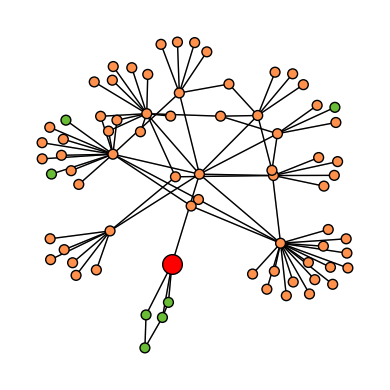

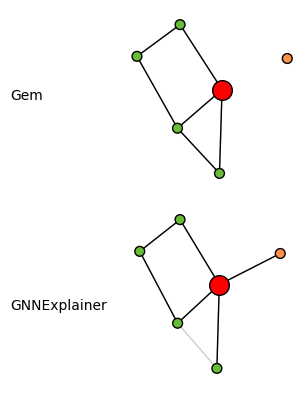

In [ ]:

import os
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import torch

device = torch.device("cpu")
seed = 0
color_map = ['#ff914d', '#68bc36', '#68bc36', '#68bc36', 'slategray', 'green', 'orange', 'olive']

# vẽ đồ thị bằng node_index
#
def plot(node_idx_new, adj, mapping, pos, ax):
    plt.axis('off')
    node_idx = mapping[node_idx_new]
    # sub_G = nx.from_numpy_matrix(adj[0].numpy())
    sub_G = nx.from_numpy_array(adj[0].numpy())
    sub_G = nx.relabel_nodes(sub_G, dict(enumerate(mapping)))
    sub_G = sub_G.subgraph(nx.node_connected_component(sub_G, node_idx))
    sub_G = sub_G.copy()
    node_labels = dict([(n, n) for n in sub_G])
    fixed_nodes = pos.keys()
    for n in fixed_nodes:
        if n not in sub_G:
            sub_G.add_node(n)
    fixed_nodes = [n for n in sub_G if n in fixed_nodes]
    if fixed_nodes:
        _pos = nx.spring_layout(sub_G, seed=seed, pos=pos, fixed=fixed_nodes)
    else:
        # pos = nx.nx_agraph.graphviz_layout(G)
        _pos = nx.spring_layout(sub_G, seed=seed)
    pos.update(_pos)
    nx.draw_networkx_edges(sub_G, pos, ax=ax)
    adj = adj[0]
    if dataset == 'syn1':
        house_idx = node_idx % 5
        base_idx = node_idx - house_idx
        idx = np.zeros(5, dtype=np.int64)
        for i in range(5):
            idx[i] = np.where(mapping==(base_idx+i))[0][0]
        adj[idx[0]][idx[1]] = 1
        adj[idx[0]][idx[3]] = 1
        adj[idx[0]][idx[4]] = 1
        adj[idx[1]][idx[2]] = 1
        adj[idx[1]][idx[4]] = 1
        adj[idx[2]][idx[3]] = 1
        adj[idx[1]][idx[0]] = 1
        adj[idx[3]][idx[0]] = 1
        adj[idx[4]][idx[0]] = 1
        adj[idx[2]][idx[1]] = 1
        adj[idx[4]][idx[1]] = 1
        adj[idx[3]][idx[2]] = 1
    # sub_G = nx.from_numpy_matrix(adj.numpy())
    sub_G = nx.from_numpy_array(adj.numpy())

    sub_G = nx.relabel_nodes(sub_G, dict(enumerate(mapping)))
    sub_G = sub_G.subgraph(nx.node_connected_component(sub_G, node_idx))
    sub_G = sub_G.copy()
    for n in fixed_nodes:
        if n not in sub_G:
            sub_G.add_node(n)
    fixed_nodes = pos.keys()
    fixed_nodes = [n for n in sub_G if n in fixed_nodes]
    for n in fixed_nodes:
        if n not in sub_G:
            sub_G.add_node(n)
    if fixed_nodes:
        _pos = nx.spring_layout(sub_G, seed=seed, pos=pos, fixed=fixed_nodes)
    else:
        _pos = nx.spring_layout(sub_G, seed=seed)
    pos.update(_pos)
    node_list = set(list(sub_G.nodes)) - set([node_idx])
    node_color = [color_map[sub_label[np.where(mapping == n)[0][0]]] for n in node_list]
    nx.draw_networkx_edges(sub_G, pos, alpha=0.2, ax=ax)
    nx.draw_networkx_nodes(sub_G, pos, nodelist=node_list, node_color=node_color, edgecolors='Black', node_size=50, ax=ax)
    nx.draw_networkx_nodes(sub_G, pos, nodelist=[node_idx], node_color=['Red'], edgecolors='Black', node_size=200, ax=ax)
    plt.tight_layout()
    return pos


# Hiển thị từng node ( node_index)
def plot_node(node_idx):
    data = torch.load("distillation/%s/node_%d.ckpt" %(distillation, node_idx), map_location=device)
    mapping = data['mapping']
    node_idx_new = np.where(mapping == node_idx)[0][0]
    global sub_label
    sub_label = torch.from_numpy(data['label']).to(device).long()
    sub_adj = torch.tensor(data['adj'], dtype=torch.float, device=device)
    org_adj = sub_adj.unsqueeze(0)
    extracted_adj = torch.from_numpy(data['adj_y']).to(device).unsqueeze(0).float()

    num_nodes = sub_adj.shape[-1]

    pos = dict({})
    fig, axes = plt.subplots(figsize=(4, 4))
    pos = plot(node_idx_new, org_adj, mapping, pos, axes)
    plt.show()
    plt.close()

    data = torch.load("%s/masked_adj_node_idx_%dgraph_idx_0.ckpt" %(gnnexp_result_path, node_idx), map_location=device)
    gnnexp_mapping = data['node_idx']
    gnnexp_label = data['label'][0]

    gnnexp_adj = data['adj']
    _m = []
    for i, n in enumerate(mapping):
        _m += [np.where(gnnexp_mapping == n)[0][0]]
    _m_dict = dict([(n, i) for i, n in enumerate(_m)])
    gnnexp_mapping = gnnexp_mapping[_m]
    gnnexp_label = gnnexp_label[_m]

    pos = dict()
    adj = dict()
    merged_adj = torch.zeros((1, num_nodes,num_nodes))
    for top_k in top_ks:
        extracted_adj = np.loadtxt("explanation/%s%s/node%d_label.csv"%(explanation_prefix, top_k, node_idx), delimiter=',')
        G3 = nx.from_numpy_array(extracted_adj)
        extracted_adj = torch.from_numpy(nx.convert_matrix.to_numpy_array(G3, weight=None)).unsqueeze(0).float()

        recovered = np.loadtxt("explanation/%s%s/node%d_pred.csv"%(explanation_prefix, top_k, node_idx), delimiter=',')
        ours_adj = recovered * sub_adj.numpy()
        np.fill_diagonal(ours_adj, 0)
        G2 = nx.from_numpy_array(ours_adj)
        d = nx.get_edge_attributes(G2,'weight')
        edges,weights = zip(*{k: d[k] for k in sorted(d, key=d.get)}.items())
        sub_edges = edges[-top_k:]
        G3 = nx.Graph()
        G3.add_nodes_from(list(G2.nodes))
        G3.add_edges_from(sub_edges)
        ours_adj = torch.from_numpy(nx.convert_matrix.to_numpy_array(G3, weight=None)).unsqueeze(0).float()

        ### Top K or threshold ###
        gnnexp_adj_topk = np.zeros((num_nodes,num_nodes))
        if top_k is not None:
            adj_threshold_num = top_k * 2
            neigh_size = len(gnnexp_adj[gnnexp_adj > 0])
            threshold_num = min(neigh_size, adj_threshold_num)
            threshold = np.sort(gnnexp_adj[gnnexp_adj > 0])[-threshold_num]
        else:
            threshold = 1e-6
        for i in range(num_nodes):
            for j in range(num_nodes):
                if gnnexp_adj[i,j] >= threshold:
                    gnnexp_adj_topk[_m_dict[i], _m_dict[j]] = 1
        gnnexp_adj_topk = torch.from_numpy(gnnexp_adj_topk).unsqueeze(0).float()
        gnnexp_node_idx_new = np.where(gnnexp_mapping == node_idx)[0][0]

        adj[top_k] = [extracted_adj, ours_adj, gnnexp_adj_topk]
        merged_adj += extracted_adj + ours_adj + gnnexp_adj_topk

    fig, axes = plt.subplots(figsize=(2,2))
    pos = plot(node_idx_new, merged_adj, mapping, pos, axes)
#     plt.show()
    plt.close()
    fig = plt.figure(figsize=(2 * len(top_ks), 6))

# Vẽ từng subplot cho mỗi giá trị top_k trong top_ks
    for idx, top_k in enumerate(top_ks):
        extracted_adj, ours_adj, gnnexp_adj_topk = adj[top_k]



        # Vẽ subplot thứ hai: Gem
        fig.text(-0.5,0.5,'Gem')
        ax2 = fig.add_subplot(3, len(top_ks), 3 * idx + 2)
        pos = plot(node_idx_new, ours_adj, mapping, pos, ax2)

        # Vẽ subplot thứ ba: GNNExplainer
        fig.text(-0.5,0.15,'GNNExplainer')

        ax3 = fig.add_subplot(3, len(top_ks), 3 * idx + 3)
        pos = plot(gnnexp_node_idx_new, gnnexp_adj_topk, gnnexp_mapping, pos, ax3)

    plt.tight_layout()  # Đảm bảo subplot được sắp xếp hợp lý
    plt.show()
    plt.close()



distillation = 'syn1_top6'
explanation_prefix = 'syn1_top'
dataset = 'syn1'

# kết quả của phương thức gnnexp
gnnexp_result_path = '/content/syn1_base_h20_o20_explain'
top_ks = [6]
plot_node(565)




In [ ]:
pip install tensorboardX


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.5 MB/s eta 0:00:00


###**Huấn luyện và đánh giá mô hình Variational Graph Autoencoder (GCN VAE) trên dữ liệu đồ thị phức tạp Mutagenicity(dữ liệu thực tế)**
- Huấn luyện và đánh giá mô hình GCN VAE trên dữ liệu đồ thị Mutagenicity.
- Trích xuất và phân tích các đặc trưng xung quanh các nút trong đồ thị.
- Dự đoán và lưu trữ các dữ liệu liên quan của các đồ thị.

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import numpy as np
import os
import sys
import shutil
import random
import networkx as nx
import matplotlib.pyplot as plt
import argparse
import scipy.sparse as sp

# khởi tạo các tham số
class Args:
    model = 'gcn_vae'
    seed = 42
    hidden1 = 32
    hidden2 = 16
    n_hops = 3
    epochs = 100
    batch_size = 32
    lr = 0.001
    dropout = 0.0
    dataset = 'Mutagenicity'
    distillation = 'mutag_top20'
    output = 'mutag_top20'
    load_checkpoint = None
    save_checkpoint = None
    gpu = True
    exclude_non_label = False
    early_stop = True
    train_on_positive_label = True
    label_feat = False
    graph_labeling = True
    degree_feat = False
    neigh_degree_feat = 0
    normalize_feat = False
    plot = False
    weighted = True
    gae3 = True
    explain_class = None
    loss = 'mse'

args = Args()

algo_conf = {
    "max_grad_norm": 1,
    "num_minibatch": 10
}


#  kiểm tra thiết bị nên xài cuda hay là cpuu
if args.gpu and torch.cuda.is_available():
    print("Use cuda")
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
np.random.seed(args.seed)
random.seed(args.seed)
if args.distillation is None:
    args.distillation = args.dataset

decimal_round = lambda x: round(x, 5)
color_map = ['gray', 'blue', 'purple', 'red', 'brown', 'green', 'orange', 'olive']
ckpt = torch.load('ckpt/%s_base_h20_o20.pth.tar'%(args.dataset))
cg_dict = ckpt["cg"]
label_onehot = torch.eye(100, dtype=torch.float)

# lấy mẫu của đồ thị và các nodes
# Lấy index của đồ thị và load dữ liệu của từng đồ thị
class GraphSampler(torch.utils.data.Dataset):
    """ Sample graphs and nodes in graph
    """

    def __init__(
        self,
        graph_idxs
    ):
        self.graph_idxs = graph_idxs
        self.graph_data = [load_graph(graph_idx) for graph_idx in graph_idxs]

    def __len__(self):
        return len(self.graph_idxs)

  # trả về đồ thị cụ thể
    def __getitem__(self, idx):
        return self.graph_data[idx]



# LOAD data theo index của graph
def load_graph(graph_idx):
    """Returns the neighborhood of a given ndoe."""
    data = torch.load("distillation/%s/graph_idx_%d.ckpt" %(args.distillation, graph_idx))
    # sử lý ma trận kề
    sub_adj = torch.from_numpy(np.int64(data['adj']>0)).float()
    adj_norm = preprocess_graph(sub_adj.numpy())
    # chuẩn hóa ma trận kề
    sub_feat = data['features'].squeeze(0)
    if args.normalize_feat:
        sub_feat = F.normalize(sub_feat, p=2, dim=1)
    if args.degree_feat:
        degree_feat = torch.sum(sub_adj, dim=0).unsqueeze(1)
        sub_feat = torch.cat((sub_feat, degree_feat), dim=1)
    if args.neigh_degree_feat > 0:
        degree_feat = torch.sum(sub_adj, dim=0)
        neigh_degree = degree_feat.repeat(100,1) * sub_adj
        v, _ = neigh_degree.sort(axis=1, descending=True)
        sub_feat = torch.cat((sub_feat, v[:,:args.neigh_degree_feat]), dim=1)
    if args.graph_labeling:
        # add graph labelling result
        graph_label = data['graph_label']
        graph_label_onehot = label_onehot[graph_label]
        sub_feat = torch.cat((sub_feat, graph_label_onehot), dim=1)
    sub_label = data['label']
    if args.weighted:
        sub_loss_diff = data['adj_y']
        # sub_loss_diff = data['adj_y']/np.max(data['adj_y'])
        # sub_loss_diff = np.sqrt(sub_loss_diff)
    else:
        sub_loss_diff = np.int64(data['adj_y']>0)
    sub_loss_diff = torch.from_numpy(sub_loss_diff).float()
    adj_label = sub_loss_diff + np.eye(sub_loss_diff.shape[0])
    n_nodes = sub_loss_diff.shape[0]
    pos_weight = float(sub_loss_diff.shape[0] * sub_loss_diff.shape[0] - sub_loss_diff.sum()) / sub_loss_diff.sum()
    pos_weight = torch.from_numpy(np.array(pos_weight))
    norm = torch.tensor(sub_loss_diff.shape[0] * sub_loss_diff.shape[0] / float((sub_loss_diff.shape[0] * sub_loss_diff.shape[0] - sub_loss_diff.sum()) * 2))
    return {
        "graph_idx": graph_idx,  # index
        "sub_adj": sub_adj.to(device),  # ma trần kề
        "adj_norm": adj_norm.to(device).float(), # ma trận kề chuẩn hóa
        "sub_feat": sub_feat.to(device).float(),  # đặc trưng
        "sub_label": sub_label.to(device).float(),  # labels của đồ thị
        "sub_loss_diff": sub_loss_diff.to(device).float(),  # loss difference matrix
        "adj_label": adj_label.to(device).float(), # labels cho ma trận kề
        "n_nodes": n_nodes, # số node
        "pos_weight": pos_weight.to(device), # trọng số
        "norm": norm.to(device)
    }

# lấy các cạnh
def get_edges(adj_dict, edge_dict, node, hop, edges=set(), visited=set()):
    for neighbor in adj_dict[node]:
        edges.add(edge_dict[node, neighbor])
        visited.add(neighbor)
    if hop <= 1:
        return edges, visited
    for neighbor in adj_dict[node]:
        edges, visited = get_edges(adj_dict, edge_dict, neighbor, hop-1, edges, visited)
    return edges, visited

# chuẩn hóa ma trận kề
def preprocess_graph(adj):
    adj_ = adj + np.eye(adj.shape[0])
    rowsum = np.array(adj_.sum(1))
    degree_mat_inv_sqrt = np.diag(np.power(rowsum, -0.5).flatten())
    adj_normalized = adj_.dot(degree_mat_inv_sqrt).transpose().dot(degree_mat_inv_sqrt)
    return torch.from_numpy(adj_normalized).float()

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

def main():

    # gắn nhẵn đồ thị,node
    def graph_labeling(G):
        for node in G:
            G.nodes[node]['string'] = 1
        old_strings = tuple([G.nodes[node]['string'] for node in G])
        for iter_num in range(100):
            for node in G:
                string = sorted([G.nodes[neigh]['string'] for neigh in G.neighbors(node)])
                G.nodes[node]['concat_string'] =  tuple([G.nodes[node]['string']] + string)
            d = nx.get_node_attributes(G,'concat_string')
            nodes,strings = zip(*{k: d[k] for k in sorted(d, key=d.get)}.items())
            map_string = dict([[string, i+1] for i, string in enumerate(sorted(set(strings)))])
            for node in nodes:
                G.nodes[node]['string'] = map_string[G.nodes[node]['concat_string']]
            new_strings = tuple([G.nodes[node]['string'] for node in G])
            if old_strings == new_strings:
                break
            else:
                old_strings = new_strings
        return G

  # kiểm thử
    def eval_model(dataset):
        with torch.no_grad():
            losses = []
            for data in dataset:
                recovered, mu, logvar = model(data['sub_feat'], data['adj_norm'])
                loss = criterion(recovered, mu, logvar, data)
                losses += [loss.view(-1)]
        return (torch.cat(losses)).mean().item()


  # plot đồ thị
    def plot_graph(graph_idx, sub_adj, sub_loss_diff, recovered):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
        G1 = nx.from_numpy_array(sub_loss_diff.numpy())
        d = nx.get_edge_attributes(G1,'weight')
        largest_cc = max(nx.connected_components(G1), key=len)
        sub_G1 = G1.subgraph(largest_cc)
        pos = nx.spring_layout(sub_G1)
        node_labels = dict([(n,n) for n in sub_G1])
        edge_labels=dict([((u,v,),decimal_round(d['weight']))
            for u,v,d in sub_G1.edges(data=True)])
        nx.draw(sub_G1,pos,node_size=400,ax=ax1)
        nx.draw_networkx_labels(sub_G1,pos,node_labels,font_size=10, font_color='w',ax=ax1)
        nx.draw_networkx_edge_labels(sub_G1,pos,edge_labels=edge_labels, font_size=6,ax=ax1)
        ax1.set_title("Important Edges")

        pred_adj = recovered.numpy() * sub_adj.numpy()
        np.fill_diagonal(pred_adj, 0)
        G2 = nx.from_numpy_array(pred_adj)
        d = nx.get_edge_attributes(G2,'weight')
        largest_cc = max(nx.connected_components(G2), key=len)
        sub_G2 = G2.subgraph(largest_cc)
        fixed_nodes = pos.keys()
        fixed_nodes = [n for n in sub_G2 if n in fixed_nodes]
        if fixed_nodes == []:
            pos = nx.spring_layout(sub_G2)
        else:
            pos = nx.spring_layout(sub_G2, pos=pos, fixed=fixed_nodes)
        node_labels = dict([(n,n) for n in sub_G2])
        edge_labels=dict([((u,v,),decimal_round(d['weight']))
            for u,v,d in sub_G2.edges(data=True)])
        nx.draw(sub_G2,pos,node_size=400,ax=ax2)
        nx.draw_networkx_labels(sub_G2,pos,node_labels,font_size=10, font_color='w',ax=ax2)
        nx.draw_networkx_edge_labels(sub_G2,pos,edge_labels=edge_labels, font_size=6,ax=ax2)
        ax2.set_title("Predict Edges")
        fig.suptitle("pred for node %d, loss = %f" %(graph_idx, loss.item()))
        plt.savefig("explanation/%s/graph_idx_%d_pred.pdf" %(args.output, graph_idx))
        plt.clf()
        plt.close(fig)


# đánh giá tập dữ liệu của đồ thị
    def eval_graph(dataset):
        start_time = time.time()
        org_adjs = []
        extracted_adjs = []
        pred_adjs = []
        graph_idxs = []
        for data in dataset:
            sub_adj = data['sub_adj']
            adj_norm = data['adj_norm']
            sub_feat = data['sub_feat']
            sub_loss_diff = data['sub_loss_diff']
            recovered, mu, logvar = model(sub_feat, adj_norm)
            graph_idxs += [data['graph_idx']]
            org_adjs += [sub_adj]
            extracted_adjs += [sub_loss_diff]
            pred_adjs += [recovered]
        print("Inference time:", time.time() - start_time)
        graph_idxs = torch.cat(graph_idxs).cpu().numpy()
        org_adjs = torch.cat(org_adjs).cpu().numpy()
        extracted_adjs = torch.cat(extracted_adjs).cpu().numpy()
        pred_adjs = torch.cat(pred_adjs).cpu().numpy()
        for idx, graph_idx in enumerate(graph_idxs):
            np.savetxt("explanation/%s/graph_idx_%d_label.csv"%(args.output, graph_idx), extracted_adjs[idx], delimiter=",")
            np.savetxt("explanation/%s/graph_idx_%d_pred.csv"%(args.output, graph_idx), pred_adjs[idx], delimiter=",")
            if args.plot:
                plot_graph(graph_idx, org_adjs[idx], extracted_adjs[idx], pred_adjs[idx])


# lưu tham số
    def save_checkpoint(filename):
        torch.save({
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'best_loss': best_loss,
            'epoch': epoch
        }, filename)
        print("Checkpoint saved to %s!" % filename)



# Load data, huấn luyện, đánh giá mô hình

    data = torch.load("distillation/%s/graph_idx_0.ckpt" %(args.distillation), map_location=device)
    feat_dim = data['features'].shape[-1]
    # add graph labeling as feature
    if args.graph_labeling:
        feat_dim += 100
    if args.degree_feat:
        feat_dim += 1
    feat_dim += args.neigh_degree_feat
    if args.gae3:
        model = GCNModelVAE3(feat_dim, args.hidden1, args.hidden2, args.dropout).to(device)
    else:
        model = GCNModelVAE(feat_dim, args.hidden1, args.hidden2, args.dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    label = cg_dict['label'].numpy()
    pretrain_gnn_pred = cg_dict['pred']
    num_graphs = label.shape[0]
    graph_idxs = np.array(range(num_graphs))
    train_idxs = np.array(cg_dict['train_idx'])
    val_idxs = np.array(cg_dict['val_idx'])
    test_idxs = np.array(cg_dict['test_idx'])
    print("args.explain_class", args.explain_class)
    if args.explain_class is not None:
        train_idxs = train_idxs[np.where(label[train_idxs] == args.explain_class)[0]]
        val_idxs = val_idxs[np.where(label[val_idxs] == args.explain_class)[0]]
        test_idxs = test_idxs[np.where(label[test_idxs] == args.explain_class)[0]]
    # Only train on samples with correct prediction
    pred_label = np.argmax(pretrain_gnn_pred[0], axis=1)
    train_idxs = train_idxs[np.where(pred_label[train_idxs] == label[train_idxs])[0]]
    print("Num of train:", len(train_idxs))
    print("Num of val:", len(val_idxs))
    print("Num of test:", len(test_idxs))

    # MSE
    def mse(x,mu,logvar,data):
        return F.mse_loss(x.view(x.shape[0], -1), data['adj_label'].view(x.shape[0], -1))


    criterion = mse

    start_epoch = 1
    best_loss = 10000
    if args.load_checkpoint is not None and os.path.exists(args.load_checkpoint):
        print("Load checkpoint from {}".format(args.load_checkpoint))
        checkpoint = torch.load(args.load_checkpoint)
        model.load_state_dict(checkpoint['model'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        start_epoch = checkpoint['epoch'] + 1
        best_loss = checkpoint['best_loss']

    train_graphs = GraphSampler(train_idxs)
    train_dataset = torch.utils.data.DataLoader(
        train_graphs,
        batch_size=args.batch_size,
        shuffle=True,
        num_workers=0,
    )
    val_graphs = GraphSampler(val_idxs)
    val_dataset = torch.utils.data.DataLoader(
        val_graphs,
        batch_size=128,
        shuffle=False,
        num_workers=0,
    )
    test_graphs = GraphSampler(test_idxs)
    test_dataset = torch.utils.data.DataLoader(
        test_graphs,
        batch_size=128,
        shuffle=False,
        num_workers=0,
    )
    print("Initial train loss:", eval_model(train_dataset))
    print("Initial val loss:", eval_model(val_dataset))
    print("Initial test loss:", eval_model(test_dataset))
    shutil.rmtree('explanation/%s' % args.output, ignore_errors=True)
    os.makedirs('explanation/%s' % args.output, exist_ok=True)
    import time
    model.train()
    start_time = time.time()
    for epoch in range(start_epoch, args.epochs+1):
        print("------- Epoch %2d ------" % epoch)
        train_losses = []
        for batch_idx, data in enumerate(train_dataset):
            optimizer.zero_grad()
            recovered, mu, logvar = model(data['sub_feat'], data['adj_norm'])
            loss = criterion(recovered, mu, logvar, data)
            loss.mean().backward()
            nn.utils.clip_grad_norm_(model.parameters(), algo_conf['max_grad_norm'])
            optimizer.step()
            train_losses += [loss.view(-1)]
            sys.stdout.flush()

        train_loss = (torch.cat(train_losses)).mean().item()
        val_loss = eval_model(val_dataset)
        test_loss = eval_model(test_dataset)
        if args.early_stop and val_loss < best_loss:
            best_loss = val_loss
            save_checkpoint('explanation/%s/model.ckpt' % args.output)
        print("Train loss:", train_loss)
        print("Val loss:", val_loss)
        print("test loss:", test_loss)
    train_time = time.time() - start_time
    print("Train time:", train_time)
    if epoch % 100 == 0:
        filename = 'explanation/%s/model.ckpt' % args.output
        shutil.copy(filename, filename[:-5]+'-%depoch-best.ckpt' % epoch)
    checkpoint = torch.load('explanation/%s/model.ckpt' % args.output)
    model.load_state_dict(checkpoint['model'])
    optimizer.load_state_dict(checkpoint['optimizer'])

    model.eval()
    with torch.no_grad():
        eval_graph(test_dataset)

if __name__ == "__main__":
    main()


# input
""" Ma trận kề
    Đặc trưng nodes
    Đặc trưng của đỉnh
    Labels
"""


Use cuda
args.explain_class None
Num of train: 3130
Num of val: 434
Num of test: 434
Initial train loss: 20.0791015625
Initial val loss: 19.854045867919922
Initial test loss: 20.078170776367188
------- Epoch  1 ------
Checkpoint saved to explanation/mutag_top20/model.ckpt!
Train loss: 12.11361026763916
Val loss: 2.806107997894287
test loss: 2.9018962383270264
------- Epoch  2 ------
Checkpoint saved to explanation/mutag_top20/model.ckpt!
Train loss: 0.49581387639045715
Val loss: 0.01839752495288849
test loss: 0.0199297983199358
------- Epoch  3 ------
Checkpoint saved to explanation/mutag_top20/model.ckpt!
Train loss: 0.014419861137866974
Val loss: 0.012545563280582428
test loss: 0.013475652784109116
------- Epoch  4 ------
Checkpoint saved to explanation/mutag_top20/model.ckpt!
Train loss: 0.011596068739891052
Val loss: 0.011375116184353828
test loss: 0.012285474687814713
------- Epoch  5 ------
Checkpoint saved to explanation/mutag_top20/model.ckpt!
Train loss: 0.010858869180083275
V

' Ma trận kề\n    Đặc trưng nodes\n    Đặc trưng của đỉnh\n    Labels\n'

###**Sử dụng phương pháp GEM và GNNExplainer để tạo ra các đồ thị con và so sánh chúng.**

Plotting explanations for graph 3942


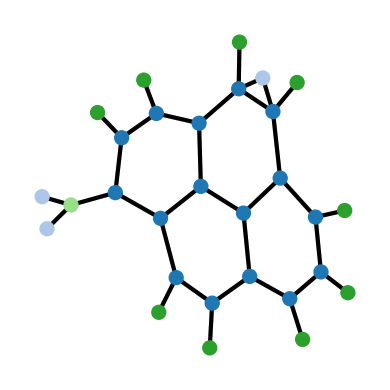

Gem's explanation with top 15 edges:


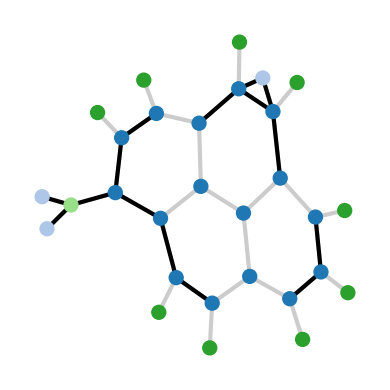

GNNExplainer's explanation with top 15 edges:


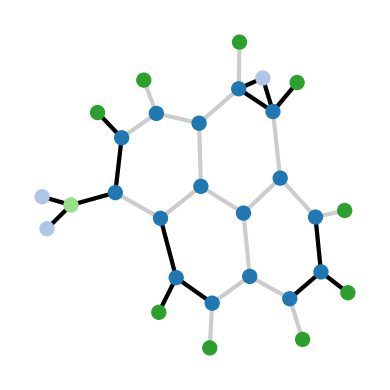

In [ ]:

import os
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import torch

device = torch.device("cpu")
color_label = ['C', 'O', 'Cl', 'H', 'N', 'F', 'Br', 'S', 'P', 'I', 'Na', 'K', 'Li', 'Ca']
cNorm  = matplotlib.colors.Normalize(vmin=0, vmax=14)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=plt.cm.tab20)
color_map = [scalarMap.to_rgba(i) for i in range(14)]


# vẽ đồ thị gốc
def plot(adj, feat, pos, ax, seed=0):
    plt.axis('off')
    G = nx.from_numpy_array(org_adj[0].numpy())
    sub_G = nx.from_numpy_array(adj[0].numpy())
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    sub_G = sub_G.subgraph(largest_cc).copy()
    node_labels = dict([(n, n) for n in sub_G])
    fixed_nodes = pos.keys()
    if fixed_nodes:
        fixed_nodes = list(G.nodes)
        _pos = nx.spring_layout(G, seed=seed, pos=pos, fixed=fixed_nodes)
    else:
        fixed_nodes = list(G.nodes)
        if layout == 'spring':
            _pos = nx.spring_layout(G, seed=seed)
        elif layout == 'kamada_kawai':
            _pos = nx.kamada_kawai_layout(G)
    pos.update(_pos)
    node_color = [color_map[np.where(feat[0][n]==1)[0][0]] if len(np.where(feat[0][n]==1)[0]) > 0 else color_map[0] for n in sub_G]

    nc = nx.draw_networkx_nodes(sub_G, pos, alpha=1, node_color=node_color, node_size=100, ax=ax)
    nx.draw_networkx_edges(sub_G, width=3, pos=pos, ax=ax)
    nx.draw_networkx_edges(G, alpha=0.2, width=3, pos=pos, ax=ax)
    plt.tight_layout()
    return pos

  # vẽ các đồ thị khi được dự đoán
def plot_graph(graph_idx):
    print("Plotting explanations for graph %s" % graph_idx)
    data = torch.load("distillation/%s/graph_idx_%d.ckpt" %(distillation, graph_idx), map_location=device)
    sub_label = data['label'].to(device)
    global org_adj
    org_adj = torch.from_numpy(np.int64(data['adj']>0)).unsqueeze(0).to(device).float()
    G = nx.from_numpy_array(data['adj'])
    G3 = nx.from_numpy_array(data['adj_y'])
    extracted_adj = torch.from_numpy(nx.to_numpy_array(G3)).unsqueeze(0).float()
    sub_feat = data['features']

    recovered = np.loadtxt("explanation/%s/graph_idx_%d_pred.csv"%(explanation, graph_idx), delimiter=',')
    ours_adj = recovered * data['adj']

    ### Top K ###
    num_nodes = ours_adj.shape[-1]
    adj_threshold_num = top_k * 2
    neigh_size = len(ours_adj[ours_adj > 0])
    threshold_num = min(neigh_size, adj_threshold_num)
    threshold = np.sort(ours_adj[ours_adj > 0])[-threshold_num]

    weighted_edge_list = [
        (i, j, ours_adj[i, j])
        for i in range(num_nodes)
        for j in range(num_nodes)
        if ours_adj[i, j] >= threshold
    ]
    G2 = nx.Graph()
    G2.add_nodes_from(range(num_nodes))
    G2.add_weighted_edges_from(weighted_edge_list)
    ours_adj = nx.to_numpy_array(G2, weight=None)
    ours_adj = torch.from_numpy(ours_adj).unsqueeze(0).float()


    gnnexp_data = torch.load(os.path.join(gnnexp_result_path, 'masked_adj_node_idx_0graph_idx_%s.ckpt' % graph_idx), map_location=device)
    gnnexp_label = sub_label
    gnnexp_adj = gnnexp_data['adj']

    ### Top K ###
    num_nodes = gnnexp_adj.shape[-1]
    adj_threshold_num = top_k * 2
    neigh_size = len(gnnexp_adj[gnnexp_adj > 0])
    threshold_num = min(neigh_size, adj_threshold_num)
    threshold = np.sort(gnnexp_adj[gnnexp_adj > 0])[-threshold_num]

    weighted_edge_list = [
        (i, j, gnnexp_adj[i, j])
        for i in range(num_nodes)
        for j in range(num_nodes)
        if gnnexp_adj[i, j] >= threshold
    ]
    G2 = nx.Graph()
    G2.add_nodes_from(range(num_nodes))
    G2.add_weighted_edges_from(weighted_edge_list)
    gnnexp_adj = nx.to_numpy_array(G2, weight=None)

    gnnexp_adj = torch.from_numpy(gnnexp_adj).unsqueeze(0).float()
    graph_label = data["label"]
    pos = dict({})
    fig, ax = plt.subplots(figsize=(4,4))
    pos = plot(org_adj, sub_feat, pos, ax, seed)
    plt.show()
    plt.close()



    print("Gem's explanation with top %d edges:" % top_k)
    fig, ax = plt.subplots(figsize=(4,4))
    pos = plot(ours_adj, sub_feat, pos, ax)
    plt.show()
    plt.close()

    print("GNNExplainer's explanation with top %d edges:" % top_k)
    fig, ax = plt.subplots(figsize=(4,4))
    pos = plot(gnnexp_adj, sub_feat, pos, ax)
    plt.show()
    plt.close()
distillation = 'mutag_top20'
explanation = 'mutag_top20'
gnnexp_result_path = '/content/Mutagenicity_base_h20_o20_explain'


seed = 4
top_k = 15
layout = 'spring'
plot_graph(3942)





Plotting explanations for graph 3907


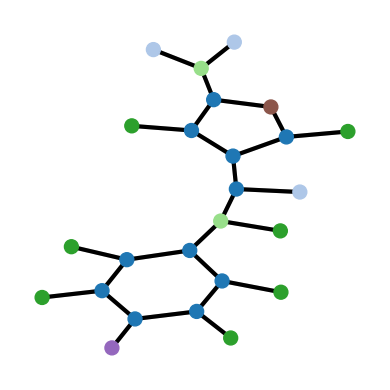

Gem's explanation with top 15 edges:


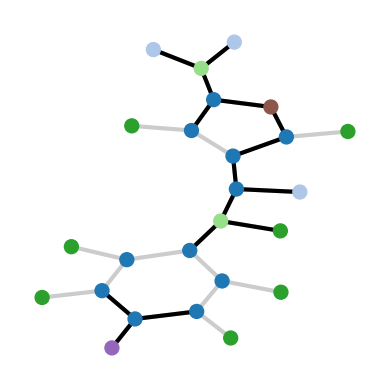

GNNExplainer's explanation with top 15 edges:


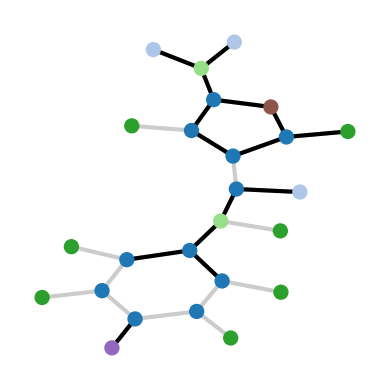

In [ ]:
seed = 0
top_k = 15
layout = 'kamada_kawai'
plot_graph(3907)

Plotting explanations for graph 3937


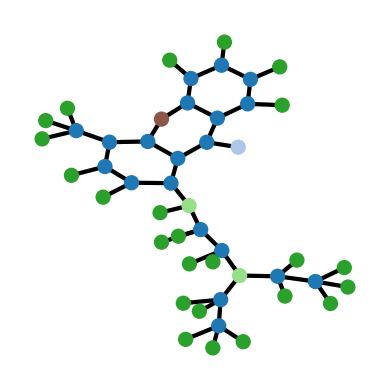

Gem's explanation with top 15 edges:


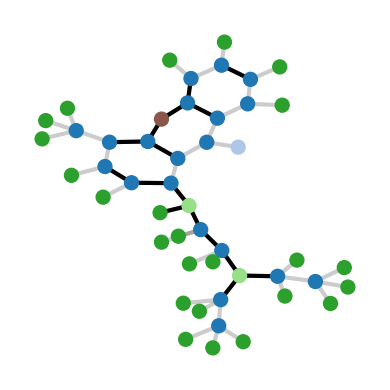

GNNExplainer's explanation with top 15 edges:


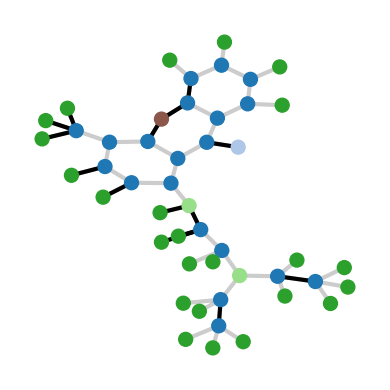

In [ ]:
seed = 0
top_k = 15
layout = 'kamada_kawai'
plot_graph(3937)

Plotting explanations for graph 3944


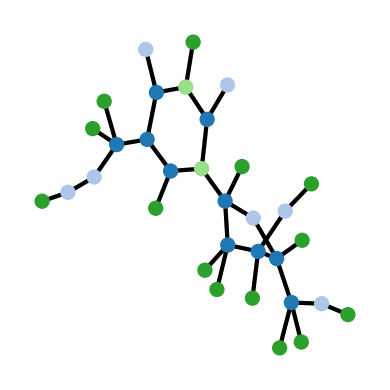

Gem's explanation with top 15 edges:


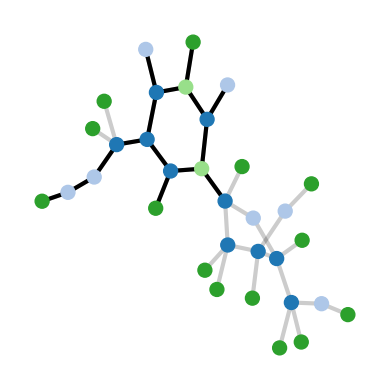

GNNExplainer's explanation with top 15 edges:


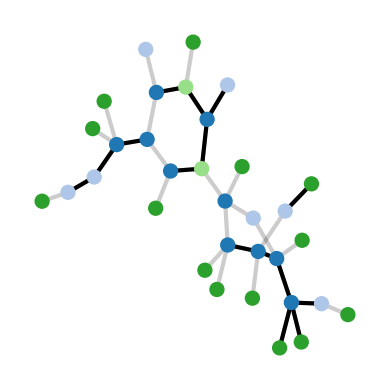

In [ ]:
seed = 0
top_k = 15
layout = 'kamada_kawai'
plot_graph(3944)